# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание проекта**

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Инструкция по выполнению проекта**
* Загрузите и изучите данные.
* Ответьте на вопрос и обоснуйте решение.

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
* a. Изменится. Приведите примеры матриц.
* b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

## Загрузка данных

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Прочитаем файл в датафрейм

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

Изучим общую информацию о файле

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Изучим первые строки файла

In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Переименуем столбцы в соответствии с правилами

In [5]:
df.rename(columns = {'Пол':'gender', 'Возраст':'age', 'Зарплата':'salary', 'Члены семьи':'family_members', 'Страховые выплаты':'payments'}, inplace = True)

In [6]:
df.head()

,gender,age,salary,family_members,payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Посмотрим количество дубликатов

In [7]:
df.duplicated().sum()

153

Удалим дубликаты

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

Изучим описательные статистики данных

In [10]:
df.describe()

,gender,age,salary,family_members,payments
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Построим график корреляции признаков

<AxesSubplot:>

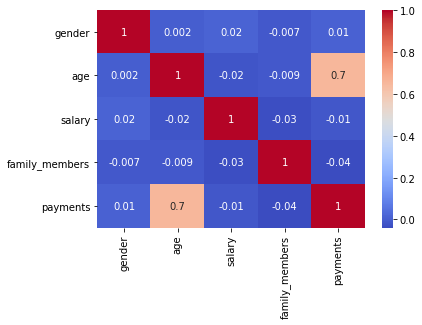

In [11]:
sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

Выводы:
* Пропусков нет
* Столбцы переименованы
* Дубликаты удалены
* Типы данных не требуют преобразования
* Корреляция существует только между целевым признаком (количество выплат) и возрастом клиента

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
* a. Изменится. Приведите примеры матриц.
* b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Представим искомую матрицу признаков $X'$ как произведение исходной матрицы $X$ и обратимой матрицы $P$:

$$
X' = X * P
$$

Подставим новое значение $X'$ в формулу обучения:

$$
w' = ((X P)^T X P)^{-1} (X P)^T y
$$

Раскроем скобки:


$$
w' = ((X P)^T X P)^{-1} (X P)^T y = (P^T (X^T X) P)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} ( (P^T)^{-1} P^T ) X^T y
$$

Матрица $P$ по условию обратима, следовательно,  произведение $(P^T)^{-1} P^T$ равно единичной матрице $E$:

$$
w' = P^{-1} (X^T X)^{-1} ( (P^T)^{-1} P^T ) X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

Часть полученного выражения совпадает с формулой обучения:

$$
w' = P^{-1} * (X^T X)^{-1} X^T y
$$

Следовательно:

$$
w' = P^{-1} w
$$

Подставим полученное значение весов  $w'$  в формулу предсказаний линейной регрессии $a = X w$:

$$
a' = X' w' = X P P^{-1} w
$$

Так как матрица $P$ по условию обратима, то произведение $P P^{-1}$ равно $E$:

$$
a' = X P P^{-1} w = X E w = X w = a
$$

Таким образом, предсказания $a'$ для матрицы признаков, умноженной на обратимую матрицу $P$, равны предсказаниям $a$, то есть качество линейной регрессии при умножении признаков на обратимую матрицу не меняется. Так как изменяются веса для новых признаков, модель необходимо переобучать на новых признаках.

Параметры линейной регрессии в задачах $w$ и $w'$ связаны следующим образом:

$$
w' = P^{-1} w
$$

## Алгоритм преобразования

При умножении исходной матрицы на обратимую должна получаться матрица такого же размера, как исходная, следовательно, ключом должна быть обратимая квадратная матрица с размером, равным количеству признаков

Проверим обратимость полученной матрицы

In [14]:
size = df.shape[1] - 1

while True:
    key = np.random.randint(100, size=(size, size))
    
    if np.linalg.det(key) != 0:
        key_inverted = np.linalg.inv(key)
        break
        
print(key, '\n\n', key_inverted)

[[66  2 69 17]
 [ 8 23 88 96]
 [67  3 73 24]
 [80 20 87 41]] 

 [[-0.22978554 -0.02214783  0.22667534  0.01444725]
 [ 0.24337758  0.0090638  -0.3155371   0.06256944]
 [ 0.30598722  0.0238144  -0.28630636 -0.01503933]
 [-0.3196487  -0.01173908  0.31915531 -0.00240848]]


Ошибки не возникло, следовательно, матрица обратима

Выделим признаки и целевой признак

In [15]:
features = df.drop('payments', axis = 1)
target = df['payments']

Масштабируем признаки с помощью StandardScaler() и сохраним их в отдельную переменную

In [16]:
scaler = StandardScaler()

scaler.fit(features)

scaled_features = scaler.transform(features)

Рассчитаем веса для исходных признаков по формуле $w = (X^T X)^{-1} X^T y$

In [17]:
w = np.linalg.inv(scaled_features.T.dot(scaled_features)).dot(scaled_features.T).dot(target)

Рассчитаем вектор предсказаний для исходных признаков по формуле $a = X w$

In [18]:
a = scaled_features @ w

Преобразуем признаки

In [19]:
converted_features = scaled_features @ key

Рассчитаем веса для преобразованных признаков

In [20]:
w1 = np.linalg.inv(converted_features.T.dot(converted_features)).dot(converted_features.T).dot(target)

Рассчитаем вектор предсказаний для преобразованных признаков

In [21]:
a1 = converted_features @ w1

Рассчитаем вектор разницы предсказаний по исходным и преобразованным признакам, и получим сумму его элементов

In [22]:
(a - a1).sum()

-1.2750000707995035e-14

Полученное число крайне мало, следовательно, $a$ и $a1$ практически не отличаются, то есть преобразование не ухудшает качество модели

## Проверка алгоритма

Обучим модель линейной регрессии на исходных данных и рассчитаем R2 и MSE

In [23]:
model = LinearRegression(normalize = True)

model.fit(features, target)

predictions = model.predict(features)

In [24]:
print('MSE:', mean_squared_error(target, predictions))
print('R2: ',r2_score(target, predictions))

MSE: 0.125272638266816
R2:  0.4302010044852068


Переобучим модель на преобразованных признаках и рассчитаем R2 и MSE

In [25]:
model.fit(converted_features, target)
predictions = model.predict(converted_features)

In [26]:
print('MSE:', mean_squared_error(target, predictions))
print('R2: ',r2_score(target, predictions))

MSE: 0.125272638266816
R2:  0.4302010044852068


Полученные значения для исходных и преобразованных данных имеют минимальные отличия, следовательно, удалось защитить данные, не ухудшив качество модели